<a href="https://colab.research.google.com/github/nrjcs/iitpbse/blob/master/dl/day1/AND_gate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementation of AND gate

In [1]:
import keras
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense


In [2]:
# Training set 1
# This will be used to train the network

# Input to the gate

x_train = np.array([[0,0],[0,1],[1,0],[1,1]], "uint8")

# Ouput of the gate, the truth value

y_train = np.array([[0],[0],[0],[1]], "uint8")

In [4]:
# Training set 2 
# Let us use real nos. instead of binary int values

# Input to the gate
x_train = np.random.uniform(low = 0, high = 1,size=400)
x_train = np.reshape(x_train, [-1,2])
print(x_train.shape)

# Output or truth values for inputs
y_train = np.zeros([x_train.shape[0]])
print(len(y_train))
for i in range(x_train.shape[0]):
    if x_train[i,0]>=0.5 and x_train[i,1]>=0.5:
        y_train[i]=1
        
# let's check the values in training set
print(x_train[:10])
print(y_train[:10])


(200, 2)
200
[[4.00721839e-01 5.69769202e-02]
 [2.76429953e-01 1.79615298e-01]
 [5.63556145e-01 3.24724687e-01]
 [5.90806103e-01 8.77016152e-04]
 [3.85231415e-02 4.51250364e-01]
 [5.65015686e-01 1.62253380e-01]
 [5.02456462e-01 5.23285977e-01]
 [6.45387116e-01 8.33972505e-01]
 [9.98287185e-01 7.89724684e-01]
 [3.88703288e-01 5.22796703e-01]]
[0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]


In [6]:
# Create neural network model
# A sequential model is one where layers are stacked one
# after another and there is not skipping, feedback and
# distributed connection

model = Sequential()

# Add a single dense layer to the model
model.add(Dense(1, activation='sigmoid', input_dim=2))      # first hidden layer
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compile the neural networks model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("model compiled")

model compiled


In [10]:
# Train the neural networks model
history = model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.7195 - accuracy: 0.4600
Epoch 2/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.7164 - accuracy: 0.4800
Epoch 3/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.7134 - accuracy: 0.4800
Epoch 4/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.7104 - accuracy: 0.4800
Epoch 5/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.7075 - accuracy: 0.4800
Epoch 6/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.7047 - accuracy: 0.4800
Epoch 7/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.7019 - accuracy: 0.4900
Epoch 8/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.6992 - accuracy: 0.5100
Epoch 9/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5050
Epoch 10/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4800
Epoch 11/1000
7/7 [

In [13]:
# What actually varible 'history' is?
type(history)

tensorflow.python.keras.callbacks.History

In [14]:
# Let's plot some graphs to see how training went by
history.history.keys()

dict_keys(['loss', 'accuracy'])

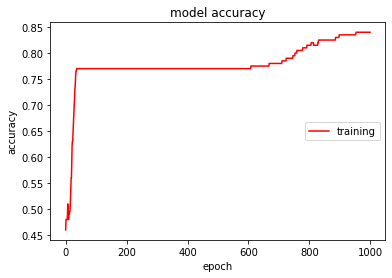

In [16]:
# Behaviour of accuracy over the epochs

plt.plot(history.history['accuracy'],'r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training'], loc='center right')
plt.show()

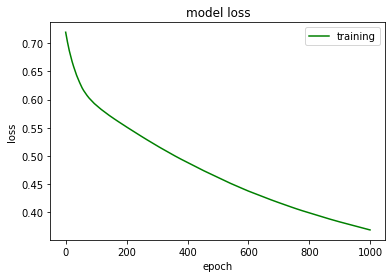

In [17]:
# Behviour of loss over the epochs

plt.plot(history.history['loss'],'g')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training'], loc='upper right')
plt.show()

In [18]:
# Let's do some prediction

test = np.array([[.1,0.7]])
model.predict(test,batch_size=1)

array([[0.1931853]], dtype=float32)